In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 


In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-02 12:08:55--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2023-10-02 12:08:56 (28.8 MB/s) - ‘data.csv’ saved [1475504/1475504]



### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data preparation

* Select only the features from above and transform their names using the next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.


In [44]:
cols = [
     'Make',
     'Model',
     'Year',
     'Engine HP',
     'Engine Cylinders',
     'Transmission Type',
     'Vehicle Style',
     'highway MPG',
     'city mpg',
     'MSRP'
]

In [57]:
data = pd.read_csv("data.csv")

In [58]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [60]:
data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [61]:
data = data[cols]
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.rename({'msrp': 'price'}, axis='columns',  inplace = True)
data


,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [163]:
data.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
price                 0
above_average         0
dtype: int64

In [167]:
data = data.fillna(0);

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC` ✅
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [169]:
data['transmission_type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg` ✅

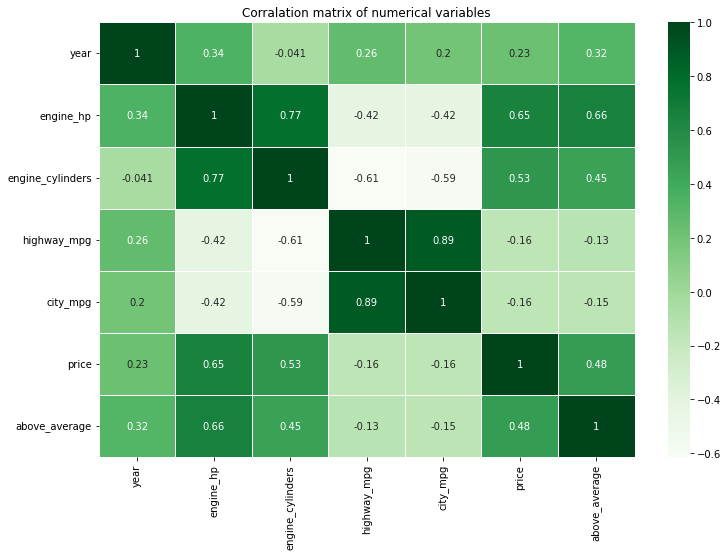

In [170]:
plt.figure(figsize=(12,8))  
sns.heatmap(data.corr(), annot=True, linewidths=.8, cmap="Greens")
plt.title('Corralation matrix of numerical variables')
plt.show()

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [171]:
price_mean = data.price.mean()

# Adding the result column
data['above_average'] = data['price'].apply(lambda x: 1 if x > price_mean else 0) 
data

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`above_average`) is not in your dataframe.

In [172]:
y = data['above_average']
X = data.drop(columns=['price', 'above_average'])
X

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16


In [173]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model` 
- `transmission_type`✅
- `vehicle_style`


In [174]:
categorical_vars = ['make', 'model', 'transmission_type', 'vehicle_style']
mutual_inf_calc = []

for cat in categorical_vars:
    mi = round(mutual_info_score(X_train[cat], y_train), 2)
    mutual_inf_calc.append(mi)
    print("For {} the MI with above_average is: {}".format(cat, mi))


For make the MI with above_average is: 0.24
For model the MI with above_average is: 0.46
For transmission_type the MI with above_average is: 0.02
For vehicle_style the MI with above_average is: 0.08


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95 ✅

In [198]:
# OHE
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']


In [190]:
dicts_X_train = X_train[categorical_vars+numerical].to_dict(orient='records')

dv_train = DictVectorizer(sparse=False)


In [191]:
dv_train.fit(dicts_X_train)

DictVectorizer(sparse=False)

In [193]:
X_train_ohe = dv_train.transform(dicts_X_train)


In [195]:
# train the model
model = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
model.fit(X_train_ohe, y_train)

val_dict = X_val[categorical_vars + numerical].to_dict(orient='records')
X_val_ohe = dv_train.transform(val_dict)
y_pred = model.predict(X_val_ohe)

#accuracy of the model w/ val
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.93


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp` ✅
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive

In [205]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']
accuracies = []

for f in features:
    dicts_X_train_f = X_train.drop(columns=f).to_dict(orient='records')
    dv_train_f = DictVectorizer(sparse=False)
    dv_train_f.fit(dicts_X_train_f)
    X_train_ohe_f = dv_train_f.transform(dicts_X_train_f)
    
    # train the model
    model_f = LogisticRegression(solver="liblinear", C=10, max_iter=1000, random_state=42)
    model_f.fit(X_train_ohe_f, y_train)

    val_dict_f = X_val.drop(columns=f).to_dict(orient='records')
    X_val_ohe_f = dv_train_f.transform(val_dict_f)
    y_pred_f = model_f.predict(X_val_ohe_f)

    #accuracy of the model w/ val
    accuracy_f = np.round(accuracy_score(y_val, y_pred_f),2)
    accuracies.append(accuracy_f)
    print("removing feature {}, the accuracy is {}, and the difference having all features is {}:".format(f, accuracy_f, np.round(accuracy-accuracy_f,2)))
    

removing feature year, the accuracy is 0.95, and the difference having all features is -0.02:
removing feature engine_hp, the accuracy is 0.93, and the difference having all features is 0.0:
removing feature transmission_type, the accuracy is 0.95, and the difference having all features is -0.02:
removing feature city_mpg, the accuracy is 0.95, and the difference having all features is -0.02:


### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0 ✅
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.



In [218]:
y = np.log1p(data['price'])
X = data.drop(columns=['price', 'above_average'])

#re 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


alphas = [0, 0.01, 0.1, 1, 10]
scores = []

for a in alphas:
    dicts_X_train_a = X_train.to_dict(orient='records')
    dv_train_a = DictVectorizer(sparse=False)
    dv_train_a.fit(dicts_X_train_a)
    X_train_ohe_a = dv_train_a.transform(dicts_X_train_a)
    
    # train the model
    model_a = Ridge(alpha=a, solver="sag", random_state=42)
    model_a.fit(X_train_ohe_a, y_train)

    val_dict_a = X_val.to_dict(orient='records')
    X_val_ohe_a = dv_train_a.transform(val_dict_a)
    y_pred_a = model_a.predict(X_val_ohe_a)

    #RMSE of the model w/ val
    score_a = round(np.sqrt(mean_squared_error(y_val, y_pred_a)),3)
    scores.append(score_a)
                    
    print("Accuracy of LinearRegression with alpha: {}: {}:".format(a, score_a))

    
    

Accuracy of LinearRegression with alpha: 0: 0.494:
Accuracy of LinearRegression with alpha: 0.01: 0.494:
Accuracy of LinearRegression with alpha: 0.1: 0.494:
Accuracy of LinearRegression with alpha: 1: 0.494:
Accuracy of LinearRegression with alpha: 10: 0.494:
